In [1]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.4/35.4 MB 2.7 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [2]:
import cv2

In [3]:
img=cv2.imread('C:/Users/Sai Pavan Reddy V/Pictures/Camera Roll/Pics/pavan/app.jpeg')

[ WARN:0@1.812] global loadsave.cpp:248 findDecoder imread_('C:/Users/Sai Pavan Reddy V/Pictures/Camera Roll/Pics/pavan/app.jpeg'): can't open/read file: check file path/integrity


In [4]:
img.shape

(541, 810, 3)

In [5]:
img[0]

array([[62, 52, 68],
       [63, 53, 69],
       [64, 54, 70],
       ...,
       [48, 43, 44],
       [48, 43, 44],
       [48, 43, 44]], dtype=uint8)

In [4]:
import matplotlib.pyplot as plt


TypeError: Image data of dtype object cannot be converted to float

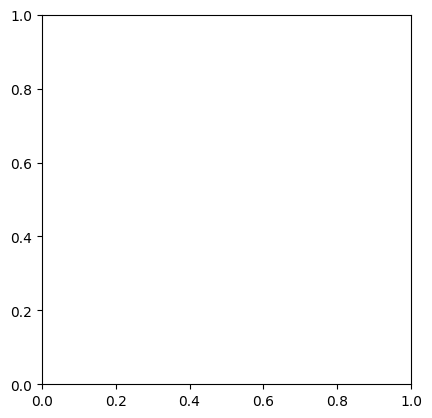

In [5]:
plt.imshow(img)

In [8]:
while True:
    cv2.imshow('result',img)
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

In [9]:
haar_data=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [10]:
haar_data.detectMultiScale(img)

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [9]:
#cv2.rectangle(img,(x,y),(w,h),(b,g,r),border_thickness)
while True:
    faces=haar_data.detectMultiScale(img)
    for x,y,w,h in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255))
    cv2.imshow('result',img)
    if cv2.waitKey(2) == 27:
        break
cv2.destroyAllWindows()

In [17]:
capture=cv2.VideoCapture(0)
data=[]
while True:
    flag, img = capture.read()
    if flag:
        faces=haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,255),2)
            face=img[y:y+h,x:x+w,:]
            face=cv2.resize(face,(500,500))
            print(len(data))
            if len(data) < 400:
                data.append(face)
        cv2.imshow('result',img)
        if cv2.waitKey(2) == 27 or len(data)>=200:
            break
capture.release()
cv2.destroyAllWindows()

error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\objdetect\src\cascadedetect.cpp:1689: error: (-215:Assertion failed) !empty() in function 'cv::CascadeClassifier::detectMultiScale'


In [12]:
import numpy as np

In [14]:
np.save('without_mask.npy',data)

In [20]:
np.save('with_mask.npy',data)

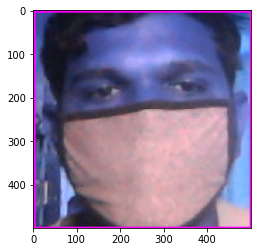

In [21]:
plt.imshow(data[25])